In [31]:
import pandas as pd
import matplotlib.pyplot as plot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

In [32]:
df = pd.read_csv('Zoo.csv')

In [33]:
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [37]:
df.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [41]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [43]:
df.isnull().sum() 

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [45]:
df.duplicated().any()

False

In [47]:
df.drop('animal name', axis=1, inplace=True)

In [49]:
df

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [53]:
import seaborn as sns

<Axes: >

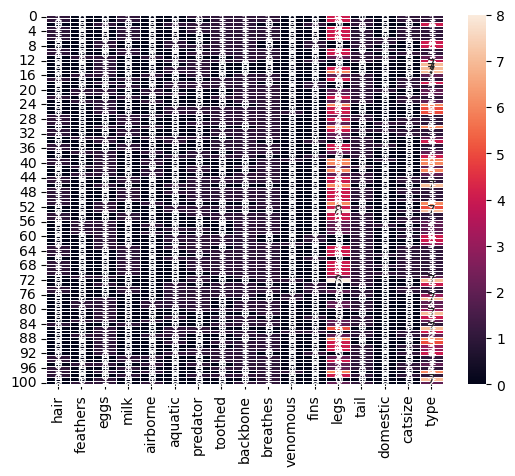

In [55]:
sns.heatmap(df, annot=True, linewidth=.5)

In [21]:
label_encoder = LabelEncoder()
df['type'] = label_encoder.fit_transform(df['type'])

In [23]:
feature = df.drop('type',axis=1)
target = df['type']

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(feature,target, test_size=0.3, random_state=42)

In [27]:
print(X_train)
print(X_test)
print(Y_train)
print(X_test)

    hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  \
91     0         0     1     0         0        0         1        1   
64     1         0     0     1         0        0         1        1   
28     1         0     0     1         0        0         0        1   
83     0         1     1     0         1        0         0        0   
5      1         0     0     1         0        0         0        1   
..   ...       ...   ...   ...       ...      ...       ...      ...   
60     0         0     1     0         0        1         1        1   
71     0         1     1     0         0        0         1        0   
14     0         0     1     0         0        1         1        0   
92     0         0     1     0         0        1         1        1   
51     1         0     1     0         1        0         0        0   

    backbone  breathes  venomous  fins  legs  tail  domestic  catsize  
91         1         1         0     0     4     1         0   

In [57]:
import numpy as np

X_train = np.ascontiguousarray(X_train)
X_test = np.ascontiguousarray(X_test)
Y_train = np.ascontiguousarray(Y_train)
Y_test = np.ascontiguousarray(Y_test)

In [59]:
knn = KNeighborsClassifier(n_neighbors=5)

In [61]:
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [63]:
y_pred = knn.predict(X_test)

In [65]:
accuracy = accuracy_score(Y_test, y_pred)
accuracy

0.8709677419354839

In [67]:
classification_rep = classification_report(Y_test, y_pred)
classification_rep

'              precision    recall  f1-score   support\n\n           0       1.00      0.93      0.97        15\n           1       1.00      1.00      1.00         3\n           2       0.00      0.00      0.00         1\n           3       0.50      1.00      0.67         2\n           4       1.00      0.50      0.67         2\n           5       0.83      1.00      0.91         5\n           6       1.00      0.67      0.80         3\n\n    accuracy                           0.87        31\n   macro avg       0.76      0.73      0.72        31\nweighted avg       0.91      0.87      0.87        31\n'

In [69]:
conf_matrix = confusion_matrix(Y_test, y_pred)
conf_matrix

array([[14,  0,  0,  1,  0,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0,  0],
       [ 0,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  5,  0],
       [ 0,  0,  0,  0,  0,  1,  2]])

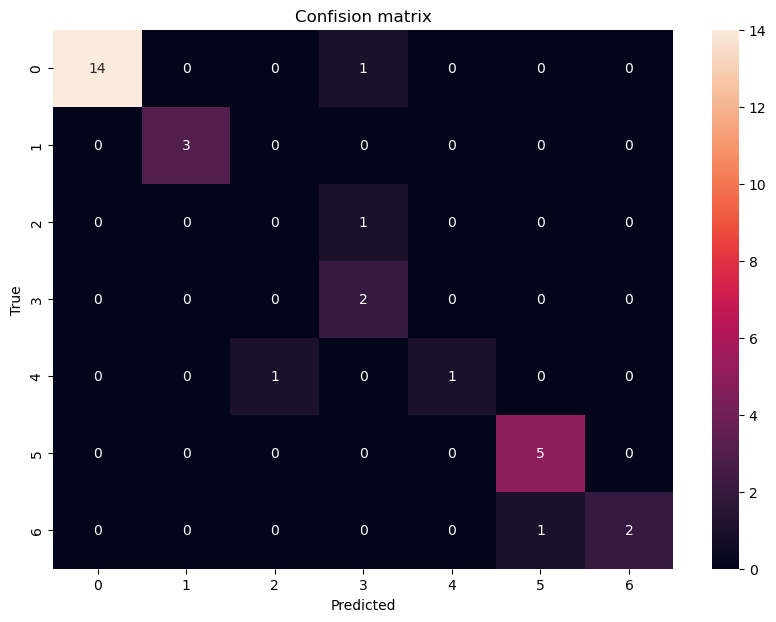

In [73]:
#visualization
# Plot confusion matrix
plot.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True)
plot.xlabel('Predicted')
plot.ylabel('True')
plot.title('Confision matrix')
plot.show()

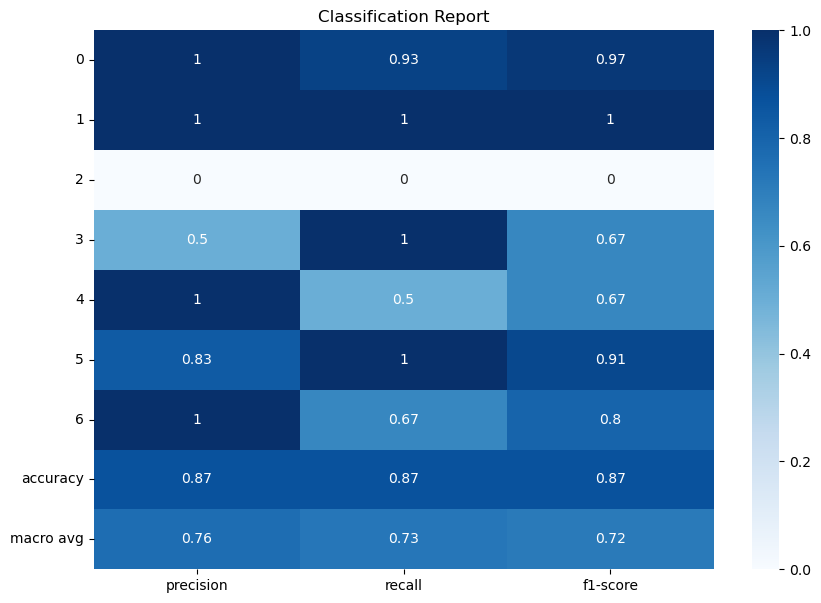

In [75]:
report_data = classification_report(Y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report_data).transpose()
plot.figure(figsize=(10,7))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='Blues')
plot.title('Classification Report')
plot.show()

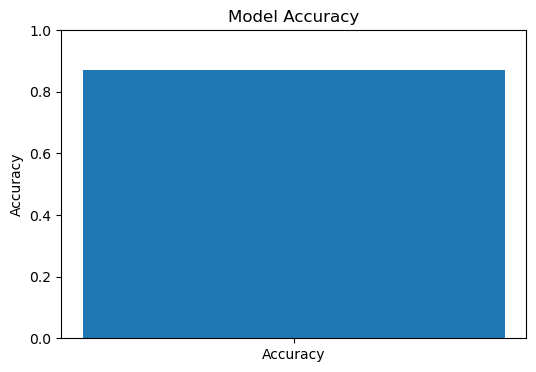

In [77]:
plot.figure(figsize=(6,4))
plot.bar(['Accuracy'],[accuracy])
plot.ylim(0,1)
plot.title('Model Accuracy')
plot.ylabel('Accuracy')
plot.show()

# Interview Questions:

# 1.What are the key hyperparameters in KNN?
In k-Nearest Neighbors (KNN) classification and regression, there are a few key hyperparameters that you can tune to optimize performance:

1.Number of Neighbors (k): This is the most crucial hyperparameter. It determines how many nearest neighbors are considered when making a prediction. A small value of k can make the model sensitive to noise in the data, while a large k can smooth out predictions but might make the model too generalized.

2.Distance Metric: This determines how the distance between data points is computed. Common distance metrics include:

*Euclidean Distance: The straight-line distance between points.
*Manhattan Distance: The sum of the absolute differences of the coordinates.
*Minkowski Distance: A generalization of Euclidean and Manhattan distances, controlled by a parameter p. For p=1, it becomes Manhattan distance, and for p=2, it becomes Euclidean distance.
*Cosine Similarity: Measures the cosine of the angle between two vectors, often used in text data.

3.Weight Function: This determines how the neighbors' votes are weighted in classification or their contributions in regression. Common options include:

*Uniform: All neighbors have equal weight.
*Distance: Closer neighbors have more influence than farther ones.

4.Algorithm: The method used to compute nearest neighbors. Options typically include:

*Brute Force: A simple but potentially slow method that computes distances to all other points.
*K-D Tree: A data structure that can speed up the search for nearest neighbors in low-dimensional spaces.
*Ball Tree: A data structure that can be more efficient for higher-dimensional spaces.

5.Leaf Size (for KDTree and Ball Tree): This parameter affects the speed of the tree-building and query operations. It defines the number of points at which the tree is divided into smaller subtrees.

Tuning these hyperparameters can significantly impact the performance of your KNN model, so it's often useful to use techniques like cross-validation to find the best combination for your specific problem.

# 2.What distance metrics can be used in KNN?
In k-Nearest Neighbors (KNN), several distance metrics can be used to determine the similarity between data points. The choice of distance metric can significantly impact the model's performance, depending on the nature of the data. Here are some common distance metrics:

(a).Euclidean Distance:

*Formula: ( d(x, y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2} )
*Description: Measures the straight-line distance between two points in Euclidean space. It's the most commonly used distance metric.

(b).Manhattan Distance:
*Formula: ( d(x, y) = \sum_{i=1}^{n} |x_i - y_i| )
*Description: Also known as the L1 norm or city block distance, it measures the sum of the absolute differences between coordinates. It is useful for cases where the data is arranged in a grid-like fashion.

(c).Minkowski Distance:
*Formula: ( d(x, y) = \left( \sum_{i=1}^{n} |x_i - y_i|^p \right)^{1/p} )
*Description: A generalization of both Euclidean and Manhattan distances. By changing the parameter ( p ), you can derive different distances:
For ( p = 1 ), it becomes Manhattan distance.
For ( p = 2 ), it becomes Euclidean distance.

(d).Cosine Similarity:

*Formula: ( \text{similarity}(x, y) = \frac{x \cdot y}{|x| |y|} )
*Description: Measures the cosine of the angle between two vectors. It is often used in text classification and information retrieval to handle high-dimensional data.

(e).Hamming Distance:
*Formula: Number of positions at which the corresponding elements are different.
*Description: Used for categorical or binary data, it counts the number of mismatches between two strings or sequences of equal length.

(f).Jaccard Distance:
*Formula: ( d(x, y) = 1 - \frac{|X \cap Y|}{|X \cup Y|} )
*Description: Used for binary or categorical data, it measures the dissimilarity between two sets as 1 minus the Jaccard similarity coefficient.

(g).Mahalanobis Distance:
*Formula: ( d(x, y) = \sqrt{(x - y)^T S^{-1} (x - y)} )
*Description: Takes into account the correlations between variables. It’s useful for identifying outliers and working with multivariate normal distributions.

Selecting the appropriate distance metric depends on the specific characteristics of your data and the problem you are trying to solve. For instance, Euclidean distance is often used for continuous numerical data, while Cosine similarity is popular in text analysis.